# Project 3

In this project, you will perform a logistic regression on the admissions data we've been working with in projects 1 and 2.

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import statsmodels.api as sm
import pylab as pl
import numpy as np
import sklearn 

In [3]:
df_raw = pd.read_csv("../assets/admissions.csv")
df = df_raw.dropna() 
print df.head()

   admit    gre   gpa  prestige
0      0  380.0  3.61       3.0
1      1  660.0  3.67       3.0
2      1  800.0  4.00       1.0
3      1  640.0  3.19       4.0
4      0  520.0  2.93       4.0


## Part 1. Frequency Tables

#### 1. Let's create a frequency table of our variables

In [4]:
# frequency table for prestige and whether or not someone was admitted

prestigeAndAdmit = df.groupby(["admit","prestige"])

In [5]:
dfcross = pd.crosstab(df.prestige,df.admit)
dfcross

admit,0,1
prestige,,
1.0,28,33
2.0,95,53
3.0,93,28
4.0,55,12


In [6]:
# describing the grouped data

prestigeAndAdmit.describe().unstack()

gpa                                                         \
               count      mean       std   min     25%    50%     75%   max   
admit prestige                                                                
0     1.0       28.0  3.345714  0.375445  2.55  3.1350  3.280  3.5775  4.00   
      2.0       95.0  3.325895  0.376339  2.42  3.0700  3.350  3.5850  4.00   
      3.0       93.0  3.402258  0.379434  2.56  3.1400  3.400  3.6900  4.00   
      4.0       55.0  3.291455  0.369767  2.26  3.0500  3.310  3.4750  4.00   
1     1.0       33.0  3.544242  0.385511  2.42  3.3700  3.610  3.8100  4.00   
      2.0       53.0  3.441698  0.365054  2.62  3.1700  3.450  3.7500  4.00   
      3.0       28.0  3.534643  0.399244  2.65  3.3425  3.620  3.8625  4.00   
      4.0       12.0  3.441667  0.297286  2.86  3.2200  3.535  3.6625  3.74   

                 gre                                                      \
               count        mean         std    min    25%    50%    75%   
admit prestige                                                             
0     1.0       28.0  582.857143  126.574737  340.0  510.0  580.0  685.0   
      2.0       95.0  588.000000  103.323495  380.0  520.0  580.0  660.0   
      3.0       93.0  562.365591  124.650798  220.0  500.0  560.0  640.0   
      4.0       55.0  562.909091  116.327646  300.0  500.0  560.0  630.0   
1     1.0       33.0  636.363636  110.618098  460.0  540.0  620.0  720.0   
      2.0       53.0  612.075472  113.635018  300.0  540.0  620.0  680.0   
      3.0       28.0  616.428571   99.785484  460.0  535.0  620.0  680.0   
      4.0       12.0  603.333333  114.680056  400.0  520.0  610.0  685.0   

                       
                  max  
admit prestige         
0     1.0       800.0  
      2.0       800.0  
      3.0       800.0  
      4.0       800.0  
1     1.0       800.0  
      2.0       800.0  
      3.0       800.0  
      4.0       780.0

## Part 2. Return of dummy variables

#### 2.1 Create class or dummy variables for prestige 

In [7]:
# here I'm prepping my data for logistic regression by creating dummy variables of my predictor column.

dummy_ranks = pd.get_dummies(df['prestige'],prefix = 'prestige')

dummy_ranks.head(10)

,prestige_1.0,prestige_2.0,prestige_3.0,prestige_4.0
0,0,0,1,0
1,0,0,1,0
2,1,0,0,0
3,0,0,0,1
4,0,0,0,1
5,0,1,0,0
6,1,0,0,0
7,0,1,0,0
8,0,0,1,0
9,0,1,0,0


#### 2.2 When modeling our class variables, how many do we need? 



Answer: We only need 3 dummy variables 'prestige_2.0', 'prestige_3.0', & 'prestige_4.0' because it helps us avoid collinearity. Also, we can safely assume that any prestige that is not 2-4 can correctly be classified as 'prestige_1.0'

## Part 3. Hand calculating odds ratios

Develop your intuition about expected outcomes by hand calculating odds ratios.

In [8]:
cols_to_keep = ['admit', 'gre', 'gpa']

handCalc = df[cols_to_keep].join(dummy_ranks.ix[:, 'prestige_1':])
print handCalc.head()

   admit    gre   gpa  prestige_1.0  prestige_2.0  prestige_3.0  prestige_4.0
0      0  380.0  3.61             0             0             1             0
1      1  660.0  3.67             0             0             1             0
2      1  800.0  4.00             1             0             0             0
3      1  640.0  3.19             0             0             0             1
4      0  520.0  2.93             0             0             0             1


In [9]:
#crosstab prestige 1 admission 
#crosstab basically produces a pivot table
# frequency table cutting prestige and whether or not someone was admitted

print pd.crosstab(handCalc['admit'], handCalc['prestige_1.0'], rownames= ['admit'])

prestige_1.0    0   1
admit                
0             243  28
1              93  33


#### 3.1 Use the cross tab above to calculate the odds of being admitted to grad school if you attended a #1 ranked college

In [10]:
df.dtypes

castType = df.prestige.astype('int64')

In [11]:
# odds formula = (# of times an event occurs / # of time an event does not occur)

odds_admission1 = (33./28)
print odds_admission1

# According to this calculation, the odds of being admitted to grad school after attending a #1 ranked college are ~1.18


1.17857142857


#### 3.2 Now calculate the odds of admission if you did not attend a #1 ranked college

In [12]:
odds_admission2 = (93./243)
print odds_admission2

# The odds of being admitted to grad school when they didn't attend a #1 ranked college are ~0.38

0.382716049383


#### 3.3 Calculate the odds ratio

In [13]:
# odds ratio = how much more likely are you to get admitted to grad school when attending a #1 ranked college
# than if you didn't attend a #1 ranked college 

odds_ratio = odds_admission1 / odds_admission2
print odds_ratio

3.07949308756


#### 3.4 Write this finding in a sentenance: 

Answer: Here, you are roughly 3 times more likely to be admitted to grad school if you attended a #1 ranked college than if you attended a lower ranking school 

#### 3.5 Print the cross tab for prestige_4

In [14]:
print pd.crosstab(handCalc['admit'], handCalc['prestige_4.0'], rownames= ['admit'])

prestige_4.0    0   1
admit                
0             216  55
1             114  12


#### 3.6 Calculate the OR 

In [15]:
odds_admittance3 = (12./55)

odds_admittance4 = (114./216)

odds_ratio2 = odds_admittance3 / odds_admittance4

print odds_ratio2

0.413397129187


#### 3.7 Write this finding in a sentence

Answer: Based on this odds_ratio, applicants are 40% less likely to be admitted if they attended a school besides a #1 ranked institution. 

## Part 4. Analysis

In [16]:
# Use cross validation to train and predict on specific parts of the data 

In [17]:
import statsmodels.api as sm

In [18]:
# create a clean data frame for the regression
cols_to_keep = ['admit', 'gre', 'gpa']
data = df[cols_to_keep].join(dummy_ranks.ix[:, 'prestige_2':])

data.head(10)

,admit,gre,gpa,prestige_2.0,prestige_3.0,prestige_4.0
0,0,380.0,3.61,0,1,0
1,1,660.0,3.67,0,1,0
2,1,800.0,4.00,0,0,0
3,1,640.0,3.19,0,0,1
4,0,520.0,2.93,0,0,1
5,1,760.0,3.00,1,0,0
6,1,560.0,2.98,0,0,0
7,0,400.0,3.08,1,0,0
8,1,540.0,3.39,0,1,0
9,0,700.0,3.92,1,0,0


In [19]:
# I'd like to see some summary statistics of the dataframe, so I can understand the data better

data.describe()

,admit,gre,gpa,prestige_2.0,prestige_3.0,prestige_4.0
count,397.000000,397.000000,397.000000,397.000000,397.000000,397.000000
mean,0.317380,587.858942,3.392242,0.372796,0.304786,0.168766
std,0.466044,115.717787,0.380208,0.484159,0.460898,0.375017
min,0.000000,220.000000,2.260000,0.000000,0.000000,0.000000
25%,0.000000,520.000000,3.130000,0.000000,0.000000,0.000000
50%,0.000000,580.000000,3.400000,0.000000,0.000000,0.000000
75%,1.000000,660.000000,3.670000,1.000000,1.000000,0.000000
max,1.000000,800.000000,4.000000,1.000000,1.000000,1.000000


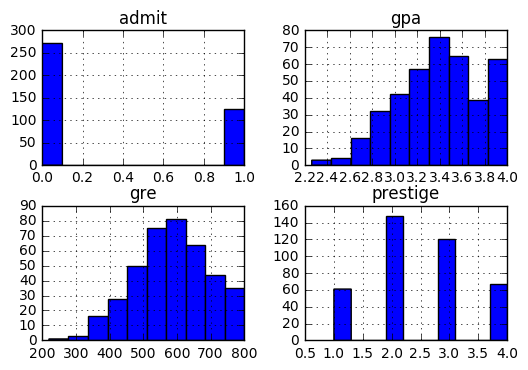

In [20]:
# Now, as part of my exploratory analysis, I'm going to plot each column in the data frame 
# Why: to visualize the distribution of the data


df.hist()
plt.show()

# Findings: 
# The most common GPA of the applicants was roughly 3.4
# The most common GRE of the applicant group was around 600
# Most applicants went to an above average college but not top ranked schools

We're going to add a constant term for our Logistic Regression. The statsmodels function we're going to be using requires that intercepts/constants are specified explicitly.

In [21]:
# manually add the intercept
#data['intercept'] = 1.0

In [22]:
#del data['intercept']

data.head()

,admit,gre,gpa,prestige_2.0,prestige_3.0,prestige_4.0
0,0,380.0,3.61,0,1,0
1,1,660.0,3.67,0,1,0
2,1,800.0,4.00,0,0,0
3,1,640.0,3.19,0,0,1
4,0,520.0,2.93,0,0,1


#### 4.1 Set the covariates to a variable called train_cols

In [23]:
# I'm creating this variable so I don't have to type out all the covariates--i.e. all the different columns
# I'm leaving out prestige_1.0 because we are treating it as our baseline and excluding it from the fit
# Including prestige_1.0 would cause unnecessary collinearity

train_cols = data.columns[1:]

print train_cols

Index([u'gre', u'gpa', u'prestige_2.0', u'prestige_3.0', u'prestige_4.0'], dtype='object')


#### 4.2 Fit the model

In [24]:
import statsmodels.api as sm

# creating a variable called 'logit', so I don't have retype the same parameter

logit = sm.Logit(data['admit'], data[train_cols])


In [25]:
# fitting the model

result = logit.fit()

Optimization terminated successfully.
         Current function value: 0.589121
         Iterations 5


#### 4.3 Print the summary results

In [26]:
print result.summary()

                           Logit Regression Results                           
Dep. Variable:                  admit   No. Observations:                  397
Model:                          Logit   Df Residuals:                      392
Method:                           MLE   Df Model:                            4
Date:                Wed, 08 Feb 2017   Pseudo R-squ.:                 0.05722
Time:                        17:37:26   Log-Likelihood:                -233.88
converged:                       True   LL-Null:                       -248.08
                                        LLR p-value:                 1.039e-05
                   coef    std err          z      P>|z|      [95.0% Conf. Int.]
--------------------------------------------------------------------------------
gre              0.0014      0.001      1.308      0.191        -0.001     0.003
gpa             -0.1323      0.195     -0.680      0.497        -0.514     0.249
prestige_2.0    -0.9562      0.302     -3.17

#### Tried to  use sklearn to fit the model & carry out the K-folds process

In [27]:
# i realized that I'd rather fit the model using sklearn instead
# sklearn will let me carry out the k-folds/cross-validation function with minimal effort

%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression as lm
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.cross_validation import cross_val_score

from sklearn.metrics import roc_curve, roc_auc_score
import numpy as np


In [28]:
from sklearn.cross_validation import cross_val_score

In [29]:
# initialize model and perform fit
model2 = lm()
features = train_cols

In [30]:
data[features].head()

,gre,gpa,prestige_2.0,prestige_3.0,prestige_4.0
0,380.0,3.61,0,1,0
1,660.0,3.67,0,1,0
2,800.0,4.00,0,0,0
3,640.0,3.19,0,0,1
4,520.0,2.93,0,0,1


In [31]:
x = data[features]
y = data.admit

model2.fit(x,y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [ ]:
# creating a variable called kf with 5 folds...using KFold attribute from sklearn

kf = cross_validation.KFold(len(data), n_folds=5, shuffle=False)

In [34]:
# get model outputs
#print lm.coef_
#print lm.intercept_
print data.admit.mean()

0.317380352645


In [35]:
scores = cross_val_score(model2, data[train_cols], data.admit, cv=5)
print scores

[ 0.7037037   0.73417722  0.70886076  0.67088608  0.69620253]


In [ ]:
data['probability'] = model.predict_proba(data[features[1:]])

In [40]:
cols_to_keep = ['admit', 'gre', 'gpa']
data = df[cols_to_keep].join(dummy_ranks.ix[:, 'prestige_2':])

data.head(15)

,admit,gre,gpa,prestige_2.0,prestige_3.0,prestige_4.0
0,0,380.0,3.61,0,1,0
1,1,660.0,3.67,0,1,0
2,1,800.0,4.00,0,0,0
3,1,640.0,3.19,0,0,1
4,0,520.0,2.93,0,0,1
5,1,760.0,3.00,1,0,0
6,1,560.0,2.98,0,0,0
7,0,400.0,3.08,1,0,0
8,1,540.0,3.39,0,1,0
9,0,700.0,3.92,1,0,0


In [43]:
### questions here -- cross validation -- feel like it shouldn't be this complicated
# producing k folds cross-validation

#mse_values = []
#scores = []
#n = 0
#y = data.admit

#for train_index, test_index in kf: 
    #lm_1 = lm.fit(data.iloc[train_index], y.iloc[train_index])
    #mse_values.append(metrics.mean_squared_error(y.iloc[test_index], lm.predict(modeldata.iloc[test_index])))
    #scores.append(lm.score(train_cols, y))

In [44]:
### printing the summary results

#### 4.4 Calculate the odds ratios of the coeffiencents and their 95% CI intervals

hint 1: np.exp(X)

hint 2: conf['OR'] = params
        
           conf.columns = ['2.5%', '97.5%', 'OR']

In [45]:
# interested in seeing how 'robust' the coefficients are for the model

print result.conf_int()

                     0         1
gre          -0.000680  0.003414
gpa          -0.513657  0.249045
prestige_2.0 -1.547279 -0.365166
prestige_3.0 -2.188769 -0.886230
prestige_4.0 -2.656743 -1.083112


In [46]:
# odds ratios

print np.exp(result.params)

gre             1.001368
gpa             0.876073
prestige_2.0    0.384342
prestige_3.0    0.214918
prestige_4.0    0.154135
dtype: float64


In [47]:
# odds ratio and 95% CI

params = result.params
conf = result.conf_int()
conf['OR'] = params
conf.columns = ['2.5%', '97.5%', 'OR']
print np.exp(conf)

                  2.5%     97.5%        OR
gre           0.999320  1.003420  1.001368
gpa           0.598303  1.282800  0.876073
prestige_2.0  0.212826  0.694082  0.384342
prestige_3.0  0.112055  0.412207  0.214918
prestige_4.0  0.070176  0.338540  0.154135


#### 4.5 Interpret the OR of Prestige_2

Answer: The odds of being admitted to grad school decrease by roughly 50 percent when the applicants school prestige is 2. 

#### 4.6 Interpret the OR of GPA

Answer: For every 1 unit increase in GPA for all students, their odds of being admitted increase by roughly 200%. In other words, if students increase their GPA by any degree, their odds of being admitted will increase significantly more than any of the other covariates.

## Part 5: Predicted probablities


As a way of evaluating our classifier, we're going to recreate the dataset with every logical combination of input values. This will allow us to see how the predicted probability of admission increases/decreases across different variables. First we're going to generate the combinations using a helper function called cartesian (above).

We're going to use np.linspace to create a range of values for "gre" and "gpa". This creates a range of linearly spaced values from a specified min and maximum value--in our case just the min/max observed values.

In [48]:
def cartesian(arrays, out=None):
    """
    Generate a cartesian product of input arrays.
    Parameters
    ----------
    arrays : list of array-like
        1-D arrays to form the cartesian product of.
    out : ndarray
        Array to place the cartesian product in.
    Returns
    -------
    out : ndarray
        2-D array of shape (M, len(arrays)) containing cartesian products
        formed of input arrays.
    Examples
    --------
    >>> cartesian(([1, 2, 3], [4, 5], [6, 7]))
    array([[1, 4, 6],
           [1, 4, 7],
           [1, 5, 6],
           [1, 5, 7],
           [2, 4, 6],
           [2, 4, 7],
           [2, 5, 6],
           [2, 5, 7],
           [3, 4, 6],
           [3, 4, 7],
           [3, 5, 6],
           [3, 5, 7]])
    """

    arrays = [np.asarray(x) for x in arrays]
    dtype = arrays[0].dtype

    n = np.prod([x.size for x in arrays])
    if out is None:
        out = np.zeros([n, len(arrays)], dtype=dtype)

    m = n / arrays[0].size
    out[:,0] = np.repeat(arrays[0], m)
    if arrays[1:]:
        cartesian(arrays[1:], out=out[0:m,1:])
        for j in xrange(1, arrays[0].size):
            out[j*m:(j+1)*m,1:] = out[0:m,1:]
    return out

In [49]:
# instead of generating all possible values of GRE and GPA, we're going
# to use an evenly spaced range of 10 values from the min to the max 
gres = np.linspace(data['gre'].min(), data['gre'].max(), 10)
print gres
# array([ 220.        ,  284.44444444,  348.88888889,  413.33333333,
#         477.77777778,  542.22222222,  606.66666667,  671.11111111,
#         735.55555556,  800.        ])
gpas = np.linspace(data['gpa'].min(), data['gpa'].max(), 10)
print gpas
# array([ 2.26      ,  2.45333333,  2.64666667,  2.84      ,  3.03333333,
#         3.22666667,  3.42      ,  3.61333333,  3.80666667,  4.        ])


# enumerate all possibilities
combos = pd.DataFrame(cartesian([gres, gpas, [1, 2, 3, 4], [1.]]))

[ 220.          284.44444444  348.88888889  413.33333333  477.77777778
  542.22222222  606.66666667  671.11111111  735.55555556  800.        ]
[ 2.26        2.45333333  2.64666667  2.84        3.03333333  3.22666667
  3.42        3.61333333  3.80666667  4.        ]


#### 5.1 Recreate the dummy variables

In [50]:
# recreate the dummy variables
# because we did enumerate, we now need to reproduce the dummy variables to match the size of the data set. 

combos.columns = ['gre', 'gpa', 'prestige', 'intercept']
dummy_ranks = pd.get_dummies(combos['prestige'], prefix='prestige')
dummy_ranks.columns = ['prestige_1', 'prestige_2', 'prestige_3', 'prestige_4']


# keep only what we need for making predictions
cols_to_keep2 = ['gre', 'gpa']
combos = combos[cols_to_keep2].join(dummy_ranks.ix[:, 'prestige_2':])


In [51]:
data.columns

Index([u'admit', u'gre', u'gpa', u'prestige_2.0', u'prestige_3.0',
       u'prestige_4.0'],
      dtype='object')

In [52]:
combos.columns = ["gre","gpa","prestige_2.0","prestige_3.0","prestige_4.0"]

In [53]:
combos.head()

,gre,gpa,prestige_2.0,prestige_3.0,prestige_4.0
0,220.0,2.260000,0,0,0
1,220.0,2.260000,1,0,0
2,220.0,2.260000,0,1,0
3,220.0,2.260000,0,0,1
4,220.0,2.453333,0,0,0


#### 5.2 Make predictions on the enumerated dataset

In [58]:
### keep getting below error here--not sure why??
# predict returns a series
# predict_proba doesn't return a series

# here, I'm adding a new column called 'admit_pred' -- which is prediction of whether or not someone will be admitted
# based on the features provided
combos['admit_pred'] = model2.predict(combos[["gre","gpa","prestige_2.0","prestige_3.0","prestige_4.0"]])


# here, I'm adding a new column called 'probability_1' -- which  is the probability of the someone being admitted
combos['probability_1'] = model2.predict_proba(combos[["gre","gpa","prestige_2.0","prestige_3.0","prestige_4.0"]]).T[1]

In [56]:
#combos.drop(["probability_0"], inplace = True, axis = 1)

In [57]:
# by default, .predict produces a threshold of 50%, but for problems like cancer for instance
# it's probably a bad idea to set thresholds at 50% because you'll end up getting a lot of false positives.
# i.e. predicting that people have cancer when they actually don't

# adding a new column to display the predicted outcome based on the new threshold of 'admit' vs. 'not admitted'
# if I wanted to set thresholds for more than a binary outcome, I'd need to use multi class classification
combos["new_threshold"] = combos.probability_1.apply(lambda x: 0 if x < 0.20 else 1)

In [195]:
combos.head()

,gre,gpa,prestige_2.0,prestige_3.0,prestige_4.0,admit_pred,probability_1,new_threshold
0,220.0,2.260000,0,0,0,0,0.289187,1
1,220.0,2.260000,1,0,0,0,0.182006,0
2,220.0,2.260000,0,1,0,0,0.111899,0
3,220.0,2.260000,0,0,1,0,0.093077,0
4,220.0,2.453333,0,0,0,0,0.298505,1


#### 5.3 Interpret findings for the last 4 observations

Answer: 

-- above, the admit_pred column is predicting that the student in 'Row 1' for instance will not be admitted because they had a low GPA, low GRE, and attended a third tier school. 

-- the probability_1 column is providing us with the actual probability of the predicted outcome. For example, even though both the students from 'Row 3' & 'Row 4' were predicted to be rejected from grad school, the student from 'Row 4' will have a much greater chance of being admitted than the student in 'Row 3'

-- the new_threshold column proves that the student in 'Row 4' had a much greater chance of acceptance that the student in 'Row 3'. It's easy to see, that if we change our threshold for being admitted from 50% probability to 20% probability, our predictions change for students in 'Row 0' and 'Row 4'. 

## Bonus

Plot the probability of being admitted into graduate school, stratified by GPA and GRE score.

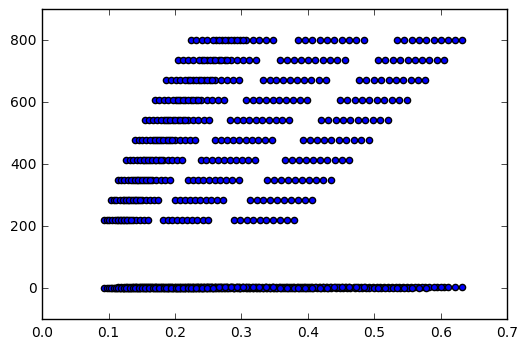

In [214]:
plt.scatter(combos.probability_1,combos.gre)
plt.scatter(combos.probability_1,combos.gpa)